In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *

### load predicted behaviors

In [5]:
behaviors = load_behaviors('../processed_dataset/behaviors_study4.pkl')

## Create Behavior Bin Ratio

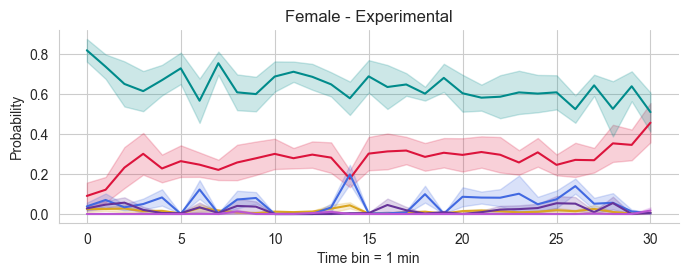

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *

# Define your data loading function (assuming it's defined elsewhere)
# def load_behaviors(file_path):
    # Your data loading code here
    # Make sure to return the loaded data structure
    # pass

# Load behaviors
behaviors = load_behaviors('../processed_dataset/behaviors_study4.pkl')

# Check if behaviors is None or empty
if behaviors is None or not behaviors:
    print("Error: Failed to load behaviors or empty dataset.")
else:
    # Assuming behavior_names and behavior_colors are defined elsewhere
    behavior_names = ['still', 'walking', 'rearing', 'grooming', 'licking hindpaw L', 'licking hindpaw_R']
    behavior_colors = ['crimson', 'darkcyan', 'goldenrod', 'royalblue', 'rebeccapurple', 'mediumorchid']

    # Select group and condition
    selected_group = 'Female'
    selected_condition = 'Experimental'

    # Define some params
    num_min = 1
    time_bin_size = 60 * 60 * num_min

    # Check if selected_group and selected_condition exist in behaviors
    if selected_group in behaviors and selected_condition in behaviors[selected_group]:
        n_bins = len(behaviors[selected_group][selected_condition]['file0']) // time_bin_size

        fig, ax = plt.subplots(figsize=(8, 2.5))

        behavior_ratios_files = {key: np.nan for key in range(len(behaviors[selected_group][selected_condition]))}

        for f in range(len(behaviors[selected_group][selected_condition])):
            binned_behaviors = []
            for bin_n in range(int(n_bins)):
                behavior_ratios = {key: 0 for key in range(len(behavior_names))}
                values, counts = np.unique(behaviors[selected_group][selected_condition][f'file{f}'][time_bin_size * bin_n:time_bin_size * (bin_n + 1)], return_counts=True)
                for i, value in enumerate(values):
                    behavior_ratios[value] = counts[i] / sum(counts)
                binned_behaviors.append(behavior_ratios)
            behavior_ratios_files[f] = binned_behaviors

        for b in range(len(behavior_names)):
            y_files = []
            for f in range(len(behavior_ratios_files)):
                y_files.append(np.hstack([behavior_ratios_files[f][bin][b] for bin in range(len(behavior_ratios_files[f]))]))
            y = np.mean(y_files, axis=0)
            x = np.arange(int(n_bins))
            #y_sem = np.std(y_files, axis=0) / np.sqrt(len(behavior_ratios_files))
            y_sem = np.std(y_files, axis=0) / np.sqrt(len(behavior_ratios_files))


            ax.plot(x, y, color=behavior_colors[b], label=behavior_names[b])
            ax.fill_between(x, y - y_sem, y + y_sem, color=behavior_colors[b], alpha=0.2)

        ax.set_title(f'{selected_group} - {selected_condition}')
        ax.set_xlabel(f'Time bin = {num_min} min')
        ax.set_ylabel('Probability')
        ax.spines[['top', 'right']].set_visible(False)
        #ax.legend()

        plt.show()
    else:
        print(f"Error: Selected group '{selected_group}' or condition '{selected_condition}' not found in the dataset.")


## Figure Save

In [22]:
fig.savefig(f'../figures/oprm1-ko_Female_Experimental.svg', 
            dpi=600, bbox_inches='tight')

## CSV mean-behavior-bins

In [24]:
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *

# Load behaviors
behaviors = load_behaviors('../processed_dataset/behaviors_study4.pkl')

# Check if behaviors is None or empty
if behaviors is None or not behaviors:
    print("Error: Failed to load behaviors or empty dataset.")
else:
    # Assuming behavior_names and behavior_colors are defined elsewhere
    behavior_names = ['still', 'walking', 'rearing', 'grooming', 'licking hindpaw L', 'licking hindpaw_R']
    behavior_colors = ['crimson', 'darkcyan', 'goldenrod', 'royalblue', 'rebeccapurple', 'mediumorchid']

    # Select group and condition
    selected_group = 'Female'
    selected_condition = 'Control'

    # Define some params
    num_min = 1
    time_bin_size = 60 * 60 * num_min

    # Check if selected_group and selected_condition exist in behaviors
    if selected_group in behaviors and selected_condition in behaviors[selected_group]:
        n_bins = len(behaviors[selected_group][selected_condition]['file0']) // time_bin_size

        behavior_ratios_files = {key: np.nan for key in range(len(behaviors[selected_group][selected_condition]))}

        for f in range(len(behaviors[selected_group][selected_condition])):
            binned_behaviors = []
            for bin_n in range(int(n_bins)):
                behavior_ratios = {key: 0 for key in range(len(behavior_names))}
                values, counts = np.unique(behaviors[selected_group][selected_condition][f'file{f}'][time_bin_size * bin_n:time_bin_size * (bin_n + 1)], return_counts=True)
                for i, value in enumerate(values):
                    behavior_ratios[value] = counts[i] / sum(counts)
                binned_behaviors.append(behavior_ratios)
            behavior_ratios_files[f] = binned_behaviors

        # Initialize a dictionary to hold the data
        data_to_save = {'Time_bin': np.arange(int(n_bins))}

        for b in range(len(behavior_names)):
            y_files = []
            for f in range(len(behavior_ratios_files)):
                y_files.append(np.hstack([behavior_ratios_files[f][bin][b] for bin in range(len(behavior_ratios_files[f]))]))
            y = np.mean(y_files, axis=0)
            x = np.arange(int(n_bins))
            y_sem = np.std(y_files, axis=0) / np.sqrt(len(behavior_ratios_files))

            # Add data to the dictionary
            data_to_save[behavior_names[b]] = y
            data_to_save[f'{behavior_names[b]}_SEM'] = y_sem

        # Convert dictionary to DataFrame
        df = pd.DataFrame(data_to_save)

        # Save DataFrame to CSV
        csv_filename = f'{selected_group}_{selected_condition}_binned-data.csv'
        df.to_csv(csv_filename, index=False)

        print(f"Data saved to {csv_filename}.")
    else:
        print(f"Error: Selected group '{selected_group}' or condition '{selected_condition}' not found in the dataset.")


Data saved to Female_Control_binned-data.csv.
